# Задать узлы интерполяции через равномерный шаг/Узлы Чебышева
# Нужно получить соотв каждому узлыу значение функции
# Для Лагранжа нужно знать все коэфф и базисные функции и базисные коэфф
# Собираю вместе и функция интерполянт есть функция от икса произвольного подаваемого аргумента
# И построить сам это график по Ln(x)


In [51]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

#### Теоретическая зависимость

In [52]:
def f(x):
    return (10 - np.cos(2*x) + np.log1p(1+x)) / (10 + x)

n = 5 # Количество узлов интерполяции
x_i_h = np.linspace(0, 10, n) # задаём узлы интерполяции 
f_x = [0]*n
for i in range(n):
    f_x[i] = f(x_i_h[i])
print(f_x)

[0.9693147180559946, 0.8976332169050438, 0.8523321118754511, 0.7434845549408752, 0.6038412293987304]


#### Построение полинома Лагранжа на равномерное сетке

In [53]:
def Ln_i(x, x_array, f_x):
    summary = 0
    
    for s in range(n):
        coeff_phi = phi_k(x, s, x_array)
        coeff_b = f_x[s]
        summary += coeff_b * coeff_phi
    
    return summary

def phi_k(x, i, x_array):
    res  = 1
    
    for j in range(n):
        if i != j:
            res *= (x - x_array[i]) / (x_array[j] - x_array[i])
    return res
    
k = 100

x_for = np.linspace(0, 10, k)
Ln = [0]*k
g_x = [0]*k
    
for i in range(k):
    Ln[i] = Ln_i(x_for[i], x_i_h, f_x)
    g_x[i] = f(x_for[i])

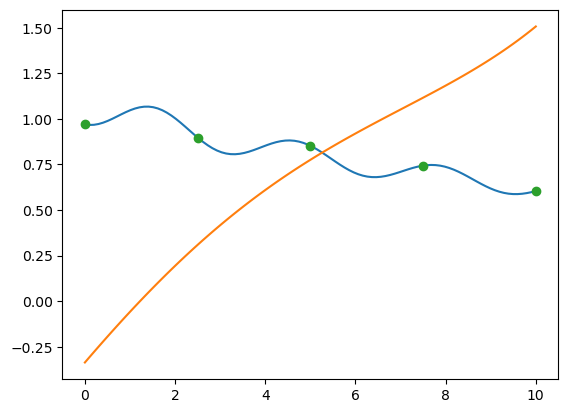

In [54]:
plt.plot(x_for, g_x) #Теоретическая зависимость от узлов интерполяции
plt.plot(x_for, Ln) # Полином Лагранжа
plt.plot(x_i_h, f_x, 'o');# Узлы интерполяции

In [55]:
def cheb_node(j):
    return 5 + 5*np.cos((np.pi * (2*j + 1)) / (2*n))
x_arr = [0]*n
r_x = [0]*n

for j in range(n):
    x_arr[j] = cheb_node(j)
    
for j in range(n):
    r_x[j] = f(x_arr[j])
for m in range(k):
        Ln[i] = Ln_i(x_for[m], x_arr, r_x)

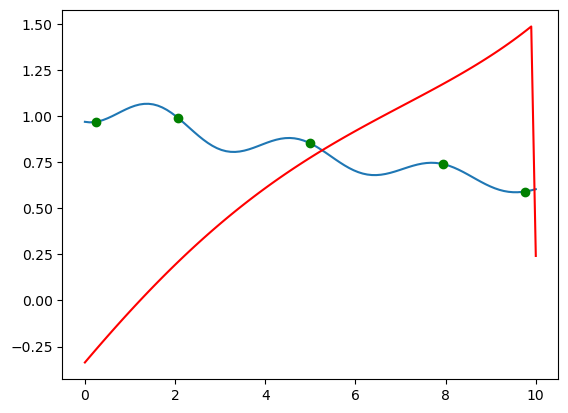

In [56]:
plt.plot(x_for, g_x) #Теоретическая зависимость разбиения на 100 точках
plt.plot(x_for, Ln, color = 'red')# Многочлен через узлы Чебышева
plt.plot(x_arr, r_x, 'o', color = 'green');